In [1]:
import os, cv2, random, torch, pandas as pd
import numpy as np
from PIL import Image, ImageDraw, ImageFont

In [2]:
image_folder_path = './Images'  
label_folder_path = './Labels'  

In [3]:
def load_images_from_folder(folder):
    images = []
    for filename in os.listdir(folder):
        if filename.endswith(".jpg") or filename.endswith(".png"):  
            img_path = os.path.join(folder, filename)
            img = Image.open(img_path)
            images.append((filename, img))
    return images

images = load_images_from_folder(image_folder_path)

In [4]:
# Verify the loaded images
for name, img in images:
    print(f"Loaded image: {name} with size {img.size}")

Loaded image: b4a0dee3-out_2_1_114.png with size (720, 480)
Loaded image: 1e8a186e-out_2_1_115.png with size (720, 480)
Loaded image: 43b22044-out_2_3_224.png with size (720, 480)
Loaded image: c81d8cf6-out_2_3_28.png with size (720, 480)
Loaded image: 7effeb40-out_2_1_519.png with size (720, 480)
Loaded image: 89b8ceb1-out_2_1_631.png with size (720, 480)
Loaded image: 0b521441-out_2_2_52.png with size (720, 480)
Loaded image: fdea3287-out_2_1_216.png with size (720, 480)
Loaded image: e7aff56a-out_2_1_63.png with size (720, 480)
Loaded image: 7a15af8b-out_2_2_123.png with size (720, 480)
Loaded image: ba795fad-out_2_1_52.png with size (720, 480)
Loaded image: 4ec07b08-out_2_2_920.png with size (720, 480)
Loaded image: a34025ea-out_2_2_423.png with size (720, 480)
Loaded image: bba60658-out_2_2_22.png with size (720, 480)
Loaded image: 7a64aa6c-out_2_3_329.png with size (720, 480)
Loaded image: 4edd2682-out_2_3_25.png with size (720, 480)
Loaded image: ed9a35a8-out_2_1_15.png with siz

In [5]:
# Load labels from text file
label_files = os.listdir(label_folder_path)
labels = []
for file in label_files:
    with open(f"./{label_folder_path}/{file}", "r") as f:
        for line in f.read().split("\n")[:-1]:
            item = [file.replace(".txt", ".png")]
            item.extend(line.split(" "))
            labels.append(item)
            

In [6]:
# Check if the labels list is populated correctly
if labels:
    print(f"First few label entries: {labels[:5]}")
else:
    print("No labels found.")


First few label entries: [['f46fd5e4-out_2_3_230.png', '0', '0.06639748766262897', '0.038358008075370126', '0.08434275459847465', '0.0740242261103634'], ['f46fd5e4-out_2_3_230.png', '0', '0.10094212651413191', '0.07267833109017496', '0.11215791834903543', '0.08344549125168235'], ['f46fd5e4-out_2_3_230.png', '0', '0.063257065948856', '0.2913862718707941', '0.08524001794526694', '0.0847913862718708'], ['f46fd5e4-out_2_3_230.png', '0', '0.07133243606998654', '0.6386271870794079', '0.07985643786451323', '0.12516823687752357'], ['f46fd5e4-out_2_3_230.png', '0', '0.3965903992821893', '0.40376850605652764', '0.0897263346792284', '0.07537012113055191']]


In [7]:
# Create the DataFrame
df = pd.DataFrame(labels, columns=["file", "class", "x_center", "y_center", "width", "height"])

In [8]:
df[['x_center', 'y_center', 'width', 'height']] = df[['x_center', 'y_center', 'width', 'height']].astype(float)

df

,file,class,x_center,y_center,width,height
0,f46fd5e4-out_2_3_230.png,0,0.066397,0.038358,0.084343,0.074024
1,f46fd5e4-out_2_3_230.png,0,0.100942,0.072678,0.112158,0.083445
2,f46fd5e4-out_2_3_230.png,0,0.063257,0.291386,0.085240,0.084791
3,f46fd5e4-out_2_3_230.png,0,0.071332,0.638627,0.079856,0.125168
4,f46fd5e4-out_2_3_230.png,0,0.396590,0.403769,0.089726,0.075370
...,...,...,...,...,...,...
1171,b23d330b-out_2_2_21.png,0,0.322118,0.871467,0.107672,0.122476
1172,56ef93a7-09152008flight2tape3_940.png,0,0.591297,0.928668,0.118439,0.061911
1173,56ef93a7-09152008flight2tape3_940.png,0,0.580081,0.964334,0.112158,0.055182
1174,56ef93a7-09152008flight2tape3_940.png,0,0.845671,0.885599,0.070884,0.080754


In [9]:
df["class"].unique()

array(['0'], dtype=object)

In [10]:
# Draw bounding boxes with RGB colors
def draw_bounding_boxes(image, labels):
    draw = ImageDraw.Draw(image)
    img_width, img_height = image.size
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # RGB colors: Red, Green, Blue
    vehicle_count = 0
    for _, row in labels.iterrows():
        x_center = float(row['x_center']) * img_width
        y_center = float(row['y_center']) * img_height
        width = float(row['width']) * img_width
        height = float(row['height']) * img_height
        x1 = x_center - width / 2
        y1 = y_center - height / 2
        x2 = x_center + width / 2
        y2 = y_center + height / 2
        color = random.choice(colors)  # Choose a random color for each bounding box
        draw.rectangle([x1, y1, x2, y2], outline=color, width=2)
        vehicle_count += 1

    # Display the number of vehicles
    font = ImageFont.load_default()
    text = f"Vehicles: {vehicle_count}"
    text_bbox = draw.textbbox((0, 0), text, font=font)
    text_width, text_height = text_bbox[2] - text_bbox[0], text_bbox[3] - text_bbox[1]
    draw.rectangle([(0, 0), (text_width + 10, text_height + 10)], fill="black")
    draw.text((5, 5), text, fill="white", font=font)
    
    return image, vehicle_count

In [11]:
def pick_random_image(folder):
    image_files = [file for file in os.listdir(folder) if file.endswith(('.jpg', '.png'))]
    random_image = random.choice(image_files)
    return random_image

# Pick a random image
random_image_file = pick_random_image(image_folder_path)
print(f"Randomly selected image: {random_image_file}")

Randomly selected image: e759c9c3-out_2_2_227.png


In [12]:
# Select an image to display
image_to_display = random_image_file
image_labels = df[df['file'] == image_to_display]
image_path = os.path.join(image_folder_path, image_to_display)

image = Image.open(image_path)
image_with_boxes, vehicle_count = draw_bounding_boxes(image, image_labels)
print(f"Number of vehicles: {vehicle_count}")
image_with_boxes.show()

Number of vehicles: 19


In [13]:
# Normalize the bounding box coordinates
df[['x_center', 'y_center', 'width', 'height']] = df[['x_center', 'y_center', 'width', 'height']].astype(float)

In [14]:
# Resize images to a consistent size and preprocess the labels
image_size = (320, 320)
preprocessed_images = []
preprocessed_labels = []

output_image_folder = './PreprocessedImages'
os.makedirs(output_image_folder, exist_ok=True)

In [15]:
for name, img in images:
    
    # Resize image
    img_resized = img.resize(image_size)
    img_array = np.array(img_resized)
    
    # Save the resized image
    img_resized.save(os.path.join(output_image_folder, name))
    
    # Get corresponding labels
    img_labels = df[df['file'] == name]
    
    for _, row in img_labels.iterrows():
        x_center = row['x_center'] * image_size[0]
        y_center = row['y_center'] * image_size[1]
        width = row['width'] * image_size[0]
        height = row['height'] * image_size[1]
        
        # Normalize bounding box coordinates relative to the resized image dimensions
        norm_x_center = x_center / image_size[0]
        norm_y_center = y_center / image_size[1]
        norm_width = width / image_size[0]
        norm_height = height / image_size[1]
        
        preprocessed_labels.append([name, row['class'], norm_x_center, norm_y_center, norm_width, norm_height])



In [16]:
# Convert labels to DataFrame
preprocessed_labels_df = pd.DataFrame(preprocessed_labels, columns=["file", "class", "x_center", "y_center", "width", "height"])

In [17]:
# Save the preprocessed labels to a CSV file
preprocessed_labels_df.to_csv('preprocessed_labels.csv', index=False)

In [18]:
# Display sample preprocessed image with bounding boxes
def draw_bounding_boxes(image_array, labels):
    img = Image.fromarray(image_array)
    draw = ImageDraw.Draw(img)
    img_width, img_height = img.size
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # RGB colors: Red, Green, Blue
    vehicle_count = 0
    for _, row in labels.iterrows():
        x_center = float(row['x_center']) * img_width
        y_center = float(row['y_center']) * img_height
        width = float(row['width']) * img_width
        height = float(row['height']) * img_height
        x1 = x_center - width / 2
        y1 = y_center - height / 2
        x2 = x_center + width / 2
        y2 = y_center + height / 2
        color = random.choice(colors)  # Choose a random color for each bounding box
        draw.rectangle([x1, y1, x2, y2], outline=color, width=2)
        vehicle_count += 1

    # Display the number of vehicles
    font = ImageFont.load_default()
    text = f"Vehicles: {vehicle_count}"
    text_bbox = draw.textbbox((5, 5), text, font=font)
    draw.rectangle([text_bbox[0], text_bbox[1], text_bbox[2], text_bbox[3]], fill="black")
    draw.text((5, 5), text, fill="white", font=font)
    
    return img, vehicle_count

In [19]:
# Example of displaying a preprocessed image with bounding boxes
example_image_name = random_image_file
example_image_path = os.path.join(output_image_folder, example_image_name)
example_image_array = np.array(Image.open(example_image_path))
example_labels = preprocessed_labels_df[preprocessed_labels_df['file'] == example_image_name]
image_with_boxes, vehicle_count = draw_bounding_boxes(example_image_array, example_labels)
print(f"Number of vehicles in preprocessed image: {vehicle_count}")
image_with_boxes.show()

Number of vehicles in preprocessed image: 19


In [20]:
import os
import pandas as pd
from PIL import Image
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms

class CustomDataset(Dataset):
    def __init__(self, annotations_file, img_dir, transform=None):
        self.annotations = pd.read_csv(annotations_file)
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.annotations)

    def __getitem__(self, idx):
        img_path = os.path.join(self.img_dir, self.annotations.iloc[idx, 0])
        image = Image.open(img_path).convert("RGB")
        boxes = self.annotations.iloc[idx, 2:].astype(float).values
        boxes = torch.tensor(boxes, dtype=torch.float32).view(-1, 4)

        if self.transform:
            image = self.transform(image)

        return image, boxes

transform = transforms.Compose([
    transforms.ToTensor(),
])

# Path to the processed images and annotation file
img_dir = './PreprocessedImages'
annotations_file = './preprocessed_labels.csv'

# Create dataset and data loader
dataset = CustomDataset(annotations_file=annotations_file, img_dir=img_dir, transform=transform)
data_loader = DataLoader(dataset, batch_size=20, shuffle=True)

In [21]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, max_boxes=20):  
        super(SimpleCNN, self).__init__()
        self.max_boxes = max_boxes
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 40 * 40, 1024)
        self.fc2 = nn.Linear(1024, max_boxes * 4)  # max_boxes bounding boxes with 4 coordinates each
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 64 * 40 * 40)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x.view(-1, self.max_boxes, 4)  # reshape to (batch_size, max_boxes, 4 coordinates each)


In [23]:
import torch.optim as optim
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(max_boxes=20).to(device)  # Ensure max_boxes is set correctly
criterion = nn.MSELoss(reduction='none')
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
model_save_path = 'simple_cnn_model.pth'  # Define the model save path

for epoch in range(num_epochs):
    for images, targets in data_loader:
        images = images.to(device)
        targets = targets.to(device)

        # Pad targets to match the shape (batch_size, max_boxes, 4)
        batch_size = targets.size(0)
        padded_targets = torch.zeros((batch_size, model.max_boxes, 4), device=device)
        for i in range(batch_size):
            target_length = min(targets.size(1), model.max_boxes)
            padded_targets[i, :target_length, :] = targets[i, :target_length, :]

        outputs = model(images)
        loss = criterion(outputs, padded_targets)
        loss = loss.mean()  # Apply mean reduction manually
        
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')
    
# Save the model
torch.save(model.state_dict(), model_save_path)
print(f'Model saved to {model_save_path}')


Epoch [1/20], Loss: 0.0015
Epoch [2/20], Loss: 0.0011
Epoch [3/20], Loss: 0.0011
Epoch [4/20], Loss: 0.0009
Epoch [5/20], Loss: 0.0008
Epoch [6/20], Loss: 0.0009
Epoch [7/20], Loss: 0.0008
Epoch [8/20], Loss: 0.0012
Epoch [9/20], Loss: 0.0011
Epoch [10/20], Loss: 0.0012
Epoch [11/20], Loss: 0.0009
Epoch [12/20], Loss: 0.0008
Epoch [13/20], Loss: 0.0010
Epoch [14/20], Loss: 0.0012
Epoch [15/20], Loss: 0.0010
Epoch [16/20], Loss: 0.0014
Epoch [17/20], Loss: 0.0010
Epoch [18/20], Loss: 0.0013
Epoch [19/20], Loss: 0.0009
Epoch [20/20], Loss: 0.0011
Model saved to simple_cnn_model.pth


In [24]:
import random
import matplotlib.pyplot as plt

In [25]:
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import pandas as pd
import random
import os
import torch.nn as nn

# Load preprocessed labels
annotations_file = './preprocessed_labels.csv'
annotations = pd.read_csv(annotations_file)

# Load a random image
output_image_folder = './PreprocessedImages'
random_image_file = random.choice(os.listdir(output_image_folder))
image_path = os.path.join(output_image_folder, random_image_file)



In [26]:
# Define the bounding box drawing function
def draw_bounding_boxes(image, labels):
    draw = ImageDraw.Draw(image)
    img_width, img_height = image.size
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # RGB colors: Red, Green, Blue
    vehicle_count = 0
    
    for _, row in labels.iterrows():
        x_center, y_center, width, height = row[['x_center', 'y_center', 'width', 'height']]
        x_min = int((x_center - width / 2) * img_width)
        y_min = int((y_center - height / 2) * img_height)
        x_max = int((x_center + width / 2) * img_width)
        y_max = int((y_center + height / 2) * img_height)
        color = random.choice(colors)
        draw.rectangle([x_min, y_min, x_max, y_max], outline=color, width=2)
        vehicle_count += 1
    
    return image, vehicle_count

In [27]:
# Define the SimpleCNN model
class SimpleCNN(nn.Module):
    def __init__(self, max_boxes=20):
        super(SimpleCNN, self).__init__()
        self.max_boxes = max_boxes
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.conv3 = nn.Conv2d(32, 64, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(64 * 40 * 40, 1024)
        self.fc2 = nn.Linear(1024, max_boxes * 4)  # max_boxes bounding boxes with 4 coordinates each
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.pool(self.relu(self.conv1(x)))
        x = self.pool(self.relu(self.conv2(x)))
        x = self.pool(self.relu(self.conv3(x)))
        x = x.view(-1, 64 * 40 * 40)
        x = self.relu(self.fc1(x))
        x = self.fc2(x)
        return x.view(-1, self.max_boxes, 4)

Model loaded from simple_cnn_model.pth


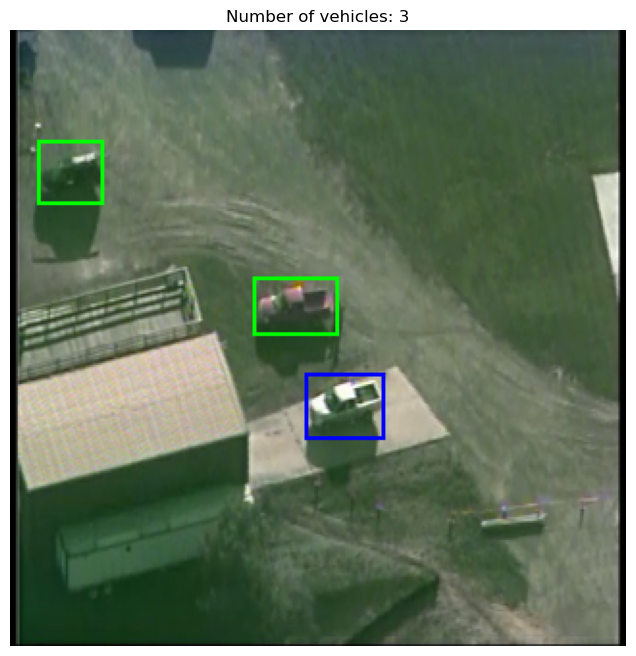

In [47]:
import os
import random
import torch
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw
import pandas as pd
import torch.nn as nn

# Load preprocessed labels
annotations_file = './preprocessed_labels.csv'
annotations = pd.read_csv(annotations_file)

# Load the trained model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = SimpleCNN(max_boxes=20).to(device)  # Ensure max_boxes is set correctly
model_path = 'simple_cnn_model.pth'

if os.path.exists(model_path):
    model.load_state_dict(torch.load(model_path))
    model.eval()
    print(f'Model loaded from {model_path}')
else:
    print(f"Model file not found: {model_path}")
    exit()

# Define the bounding box drawing function
def draw_bounding_boxes(image, labels):
    draw = ImageDraw.Draw(image)
    img_width, img_height = image.size
    colors = [(255, 0, 0), (0, 255, 0), (0, 0, 255)]  # RGB colors: Red, Green, Blue
    vehicle_count = 0
    
    for _, row in labels.iterrows():
        x_center, y_center, width, height = row[['x_center', 'y_center', 'width', 'height']]
        x_min = int((x_center - width / 2) * img_width)
        y_min = int((y_center - height / 2) * img_height)
        x_max = int((x_center + width / 2) * img_width)
        y_max = int((y_center + height / 2) * img_height)
        color = random.choice(colors)
        draw.rectangle([x_min, y_min, x_max, y_max], outline=color, width=2)
        vehicle_count += 1
    
    return image, vehicle_count

# Preprocess the image for the model
transform = transforms.Compose([
    transforms.Resize((320, 320)),
    transforms.ToTensor()
])

# Select a random image each time
output_image_folder = './PreprocessedImages'
random_image_file = random.choice(os.listdir(output_image_folder))
image_path = os.path.join(output_image_folder, random_image_file)

# Load and preprocess the image
image = Image.open(image_path).convert("RGB")
input_tensor = transform(image).unsqueeze(0).to(device)

# Perform inference
with torch.no_grad():
    output = model(input_tensor)

# Process output to extract bounding boxes
output_boxes = output[0].cpu().numpy()  # Detach and move to CPU

# Get labels for the current image
image_labels = annotations[annotations['file'] == random_image_file]

# Draw bounding boxes on the image
image_with_boxes, vehicle_count = draw_bounding_boxes(image, image_labels)

# Display the image with bounding boxes
plt.figure(figsize=(8, 8))
plt.imshow(image_with_boxes)
plt.title(f'Number of vehicles: {vehicle_count}')
plt.axis('off')
plt.show()
